# Implementation of K-Nearest Neighbors on MNIST dataset
This is a sample implementation of k-nearest neighbors using `numpy`. The MNIST dataset is a dataset of handwritten digits, stored as 28 x 28 images. We first define functions to read from the train and test datasets, and plot an image.

In [3]:
import numpy as np
import matplotlib.pyplot as plt
import gzip

FILE_NAME = 'train-images-idx3-ubyte.gz'
IMAGE_SIZE = 28
NUM_IMAGES = 2000

def read_images(num_images=NUM_IMAGES, image_size=IMAGE_SIZE, file_name=FILE_NAME):
    f = gzip.open(file_name, 'r')
    f.read(16)
    buf = f.read(image_size * image_size * num_images)
    data = np.frombuffer(buf, dtype=np.uint8).astype(np.float32)
    data = data.reshape(num_images, image_size * image_size)
    f.close()
    return data

FILE_NAME_Y = 'train-labels-idx1-ubyte.gz'
def read_labels(num_images=NUM_IMAGES, file_name=FILE_NAME_Y):
    f = gzip.open(file_name, 'r')
    f.read(8)
    buf = f.read(num_images)
    labels = np.frombuffer(buf, dtype=np.uint8).astype(np.int64)
    f.close()
    return labels

def plot_image(data, name='Image'):
    image = np.asarray(data).reshape(28,28,1).squeeze()
    plt.imshow(image)
    plt.title(name)
    plt.show()
    
def plot_comparison(test_data, train_data):
    image_test = np.asarray(test_data).reshape(28,28,1).squeeze()
    image_train = np.asarray(train_data).reshape(28,28,1).squeeze()
    
    plt.subplot(1,2,1)
    plt.imshow(image_test)
    plt.title('Test Image')
    
    plt.subplot(1,2,2)
    plt.imshow(image_train)
    plt.title('Neares Neighbor Image')
    
    plt.show()

`classify` returns the indices of the $k$ nearest neighbors. We represent the training data as a $n$ $\times$ $(28\cdot28)$ matrix, subtract the row vector corresponding test image from all rows in the training data, and use this to calculate the Euclidean distance to each training image. Below, we show the nearest neighbor for a few examples.

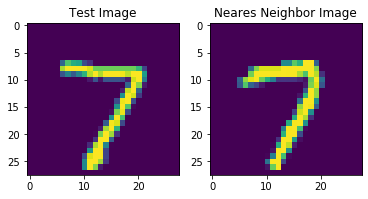

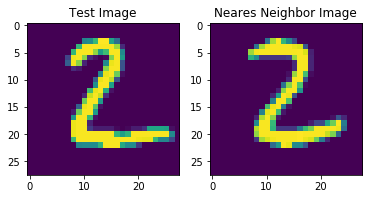

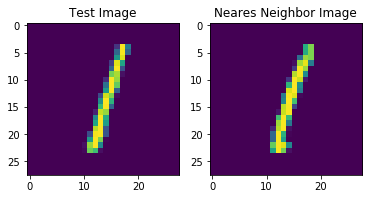

In [4]:
train = read_images()
labels = read_labels()
test = read_images(num_images=200, file_name='t10k-images-idx3-ubyte.gz')
test_labels = read_labels(num_images=200, file_name='t10k-labels-idx1-ubyte.gz')

def classify(k, image, train, labels):
    A = np.square(train - image)
    distances = np.sqrt(A @ np.ones(A.shape[1]))
    idx = np.argpartition(distances, k)[:k]
    neighbors = labels[idx]
    return idx, np.bincount(neighbors).argmax()
    

idx0, _ = classify(1, test[0], train, labels)
idx1, _ = classify(1, test[1], train, labels)
idx2, _ = classify(1, test[2], train, labels)

plot_comparison(test[0], train[idx0[0]])
plot_comparison(test[1], train[idx1[0]])
plot_comparison(test[2], train[idx2[0]])

A very simple algorithm like k-nearest neighbors can produce surprisingly accurate results on the MNIST dataset:

In [5]:
def preds(k, test, train, labels):    
    pred = []
    for image in test:
        _, pred_label = classify(k, image, train, labels)
        pred.append(pred_label)
    
    return pred
    
for k in range(1,6):
    print('Accuracy (k = %d): %.2f' % (k, np.mean(preds(k, test, train, labels) == test_labels)))

Accuracy (k = 1): 0.88
Accuracy (k = 2): 0.86
Accuracy (k = 3): 0.91
Accuracy (k = 4): 0.89
Accuracy (k = 5): 0.90
